In [6]:
!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import statsmodels as sm
import yfinance as yf
data = yf.download("AAPL MSFT TSLA", start="2020-01-01", end="2025-08-30")

import warnings
warnings.filterwarnings('ignore')


/tmp/ipython-input-371218371.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL MSFT TSLA", start="2020-01-01", end="2025-08-30")
[*********************100%***********************]  3 of 3 completed


In [7]:
ticker = 'MSFT'
start_date = '2020-01-01'
end_date = '2025-09-30'
df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [8]:
df.head()


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2020-01-02,152.791122,152.895761,150.612747,151.040810,22622100
2020-01-03,150.888596,152.153771,150.355893,150.603230,21116200
2020-01-06,151.278610,151.345205,148.881435,149.423659,20813700
2020-01-07,149.899277,151.887403,149.651955,151.554471,21634100
2020-01-08,152.286896,152.962295,150.251204,151.183433,27746500


In [9]:
df.tail()


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2025-09-23,509.230011,514.590027,507.309998,513.799988,19799600
2025-09-24,510.149994,512.479980,506.920013,510.380005,13533700
2025-09-25,507.029999,510.010010,505.040009,508.299988,15786500
2025-09-26,511.459991,513.940002,506.619995,510.059998,16213100
2025-09-29,514.599976,516.849976,508.880005,511.500000,17617800


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1443 entries, 2020-01-02 to 2025-09-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   1443 non-null   float64
 1   (High, MSFT)    1443 non-null   float64
 2   (Low, MSFT)     1443 non-null   float64
 3   (Open, MSFT)    1443 non-null   float64
 4   (Volume, MSFT)  1443 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 67.6 KB


In [11]:
df.describe()


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
count,1443.000000,1443.000000,1443.000000,1443.000000,1.443000e+03
mean,308.403409,311.302212,305.236239,308.316881,2.779657e+07
std,95.457880,95.829003,95.054109,95.540489,1.244829e+07
min,129.171234,134.083658,126.405108,130.687916,7.164500e+06
25%,235.043381,236.747463,232.017184,234.201251,1.977270e+07
50%,290.016174,292.357792,287.147121,290.016132,2.462000e+07
75%,398.471802,402.155065,395.773824,399.242649,3.199985e+07
max,534.760925,554.538376,531.027040,554.318706,9.701270e+07


In [12]:
df.columns


MultiIndex([( 'Close', 'MSFT'),
            (  'High', 'MSFT'),
            (   'Low', 'MSFT'),
            (  'Open', 'MSFT'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])

In [13]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()


In [14]:
print(df.isnull().sum())


Price   Ticker
Close   MSFT      0
High    MSFT      0
Low     MSFT      0
Open    MSFT      0
Volume  MSFT      0
dtype: int64


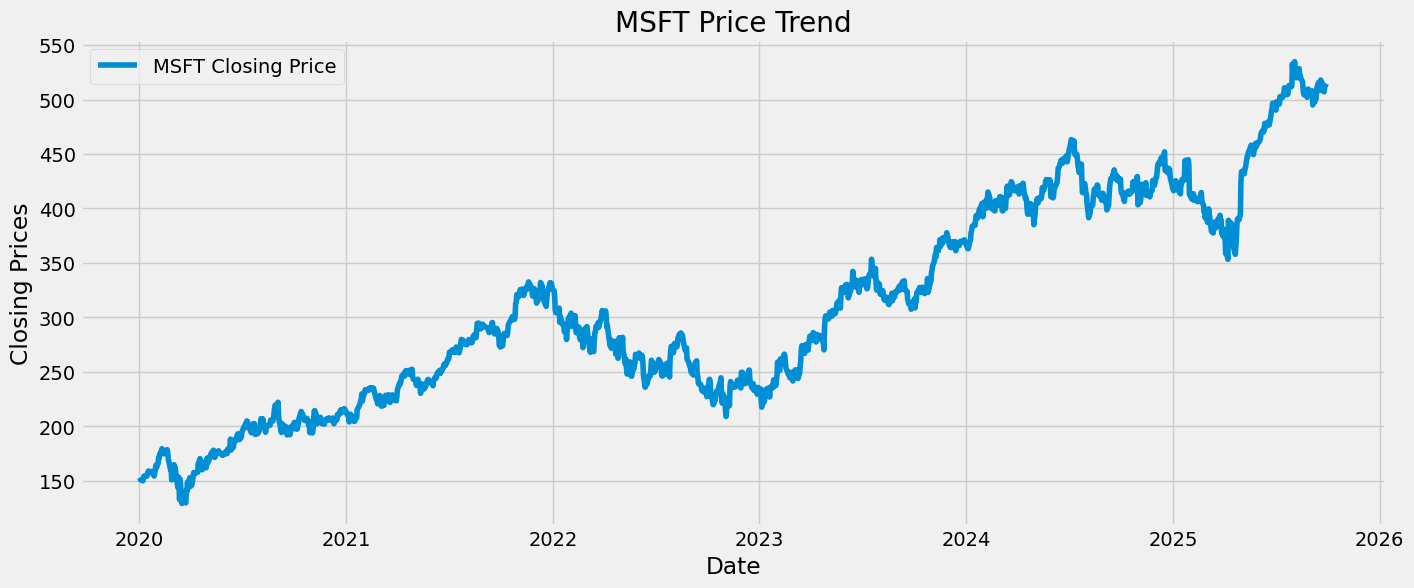

In [15]:
plt.figure(figsize=(15,6))
plt.plot(df['Close'],label='MSFT Closing Price')
plt.title('MSFT Price Trend')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.show()


In [16]:
target_col= df[['Close']].copy().astype(int) # converting data type to int
target_col.head(5)


Price,Close
Ticker,MSFT
Date,
2020-01-02,152
2020-01-03,150
2020-01-06,151
2020-01-07,149
2020-01-08,152


In [17]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(target_col['Close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -0.42821165836548136
p-value: 0.9052808130552285


In [18]:
target_col['Close_Diff'] = target_col['Close'].diff()

# Drop NaN created by differencing
diff_series = target_col['Close_Diff'].dropna()

# ADF Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(diff_series)
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -40.991969930007066
p-value: 0.0


In [19]:
target_col.head()


Price,Close,Close_Diff
Ticker,MSFT,
Date,,
2020-01-02,152,NaN
2020-01-03,150,-2.0
2020-01-06,151,1.0
2020-01-07,149,-2.0
2020-01-08,152,3.0


<Axes: ylabel='Density'>

<Figure size 1500x600 with 0 Axes>

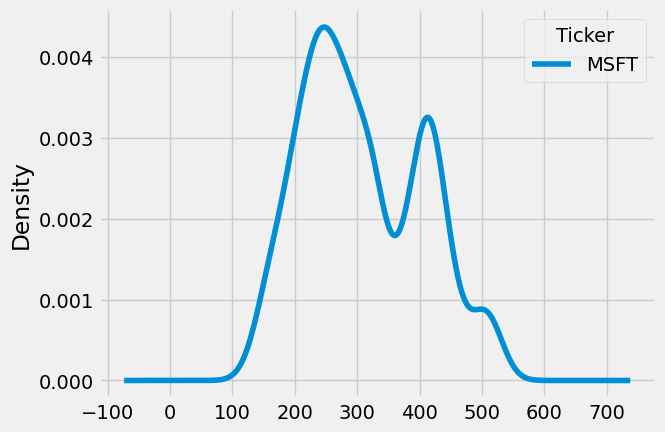

In [20]:
plt.figure(figsize=(15,6))
df['Close'].plot(kind='kde')


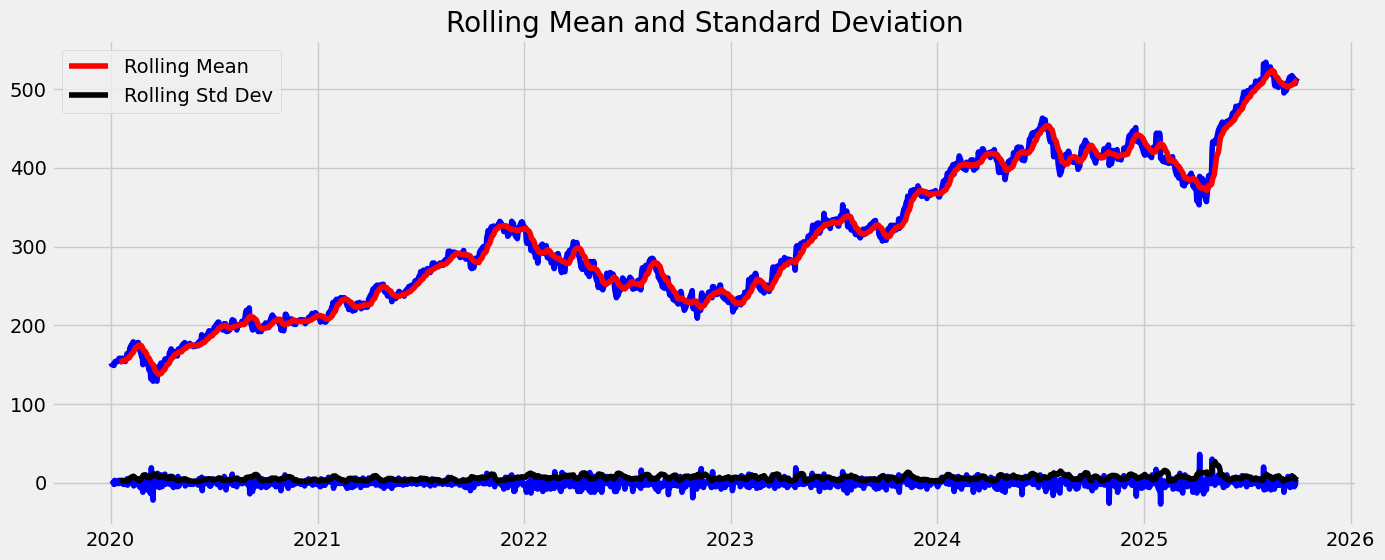

In [21]:
rolmean = target_col['Close'].rolling(12).mean()
rolstd = target_col['Close'].rolling(12).std()

plt.figure(figsize=(15,6))
plt.plot(target_col, color='blue')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std Dev')

plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show()


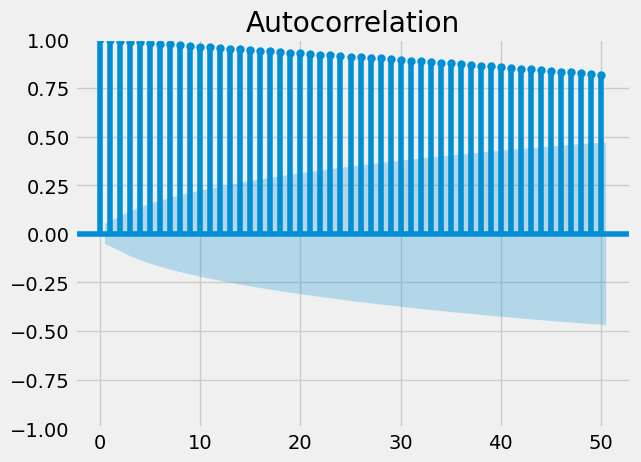

<Figure size 1500x600 with 0 Axes>

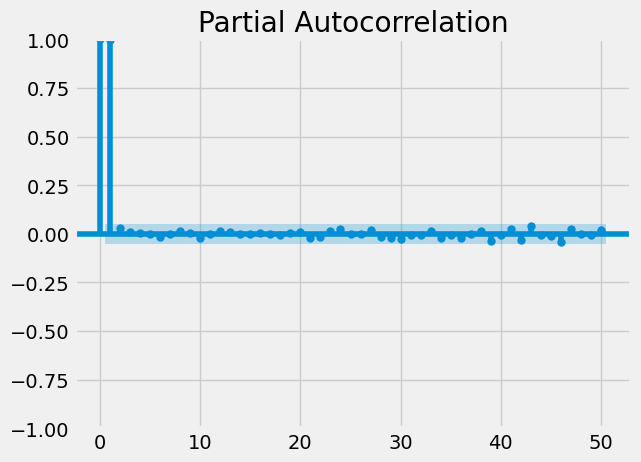

<Figure size 1500x600 with 0 Axes>

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Close'], lags=50)
plt.figure(figsize=(15,6))
plt.show()

plot_pacf(df['Close'], lags=50)
plt.figure(figsize=(15,6))
plt.show()


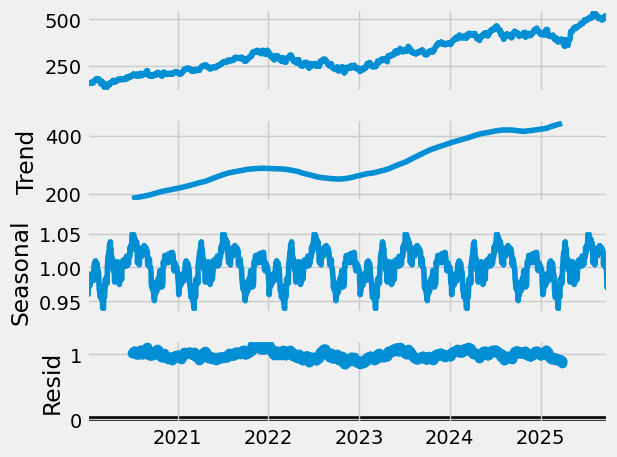

<Figure size 1500x600 with 0 Axes>

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=252)  # ~252 trading days/year
decomposition.plot()
plt.figure(figsize=(15,6))
plt.show()


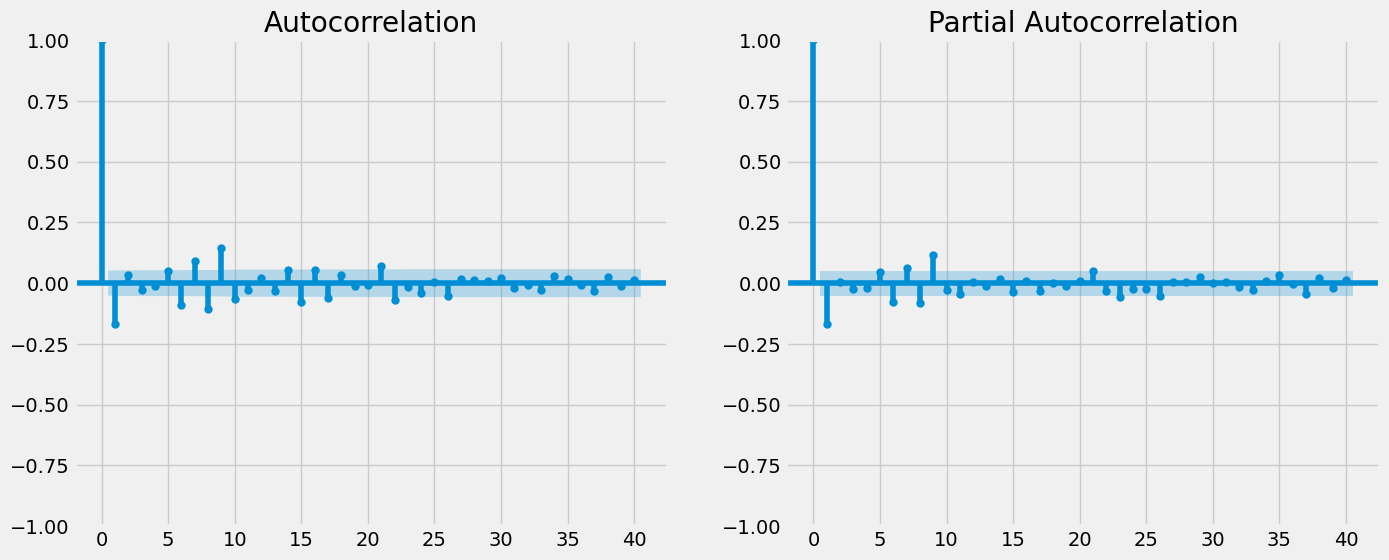

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use log returns as the stationary series
log_ret = np.log(df['Close']).diff().dropna()

# ACF and PACF plots on logs of closing price
fig, ax = plt.subplots(1,2, figsize=(15,6))
plot_acf(log_ret, lags=40, ax=ax[0])
plot_pacf(log_ret, lags=40, ax=ax[1])
plt.show()


In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Build ARIMA model (example with p=3, d=1, q=2)
model = ARIMA(df['Close'], order=(3,1,2))  # direct on price with differencing
model_fit = model.fit()

print(model_fit.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   MSFT   No. Observations:                 1443
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -4389.477
Date:                Thu, 16 Oct 2025   AIC                           8790.954
Time:                        17:13:02   BIC                           8822.597
Sample:                             0   HQIC                          8802.765
                               - 1443                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0513      0.075     -0.681      0.496      -0.199       0.096
ar.L2         -0.9158      0.080    -11.404      0.000      -1.073      -0.758
ar.L3         -0.0929      0.023     -4.085      0.0

In [26]:
train = df['Close'][:-365]
test = df['Close'][-365:]

# Fit ARIMA on training set
model = ARIMA(train, order=(3,1,2))  # adjust order after checking ACF/PACF
model_fit = model.fit()

# Forecast on test set length
forecast = model_fit.forecast(steps=len(test))


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 49.01378384955287
MAE: 35.05286609801018


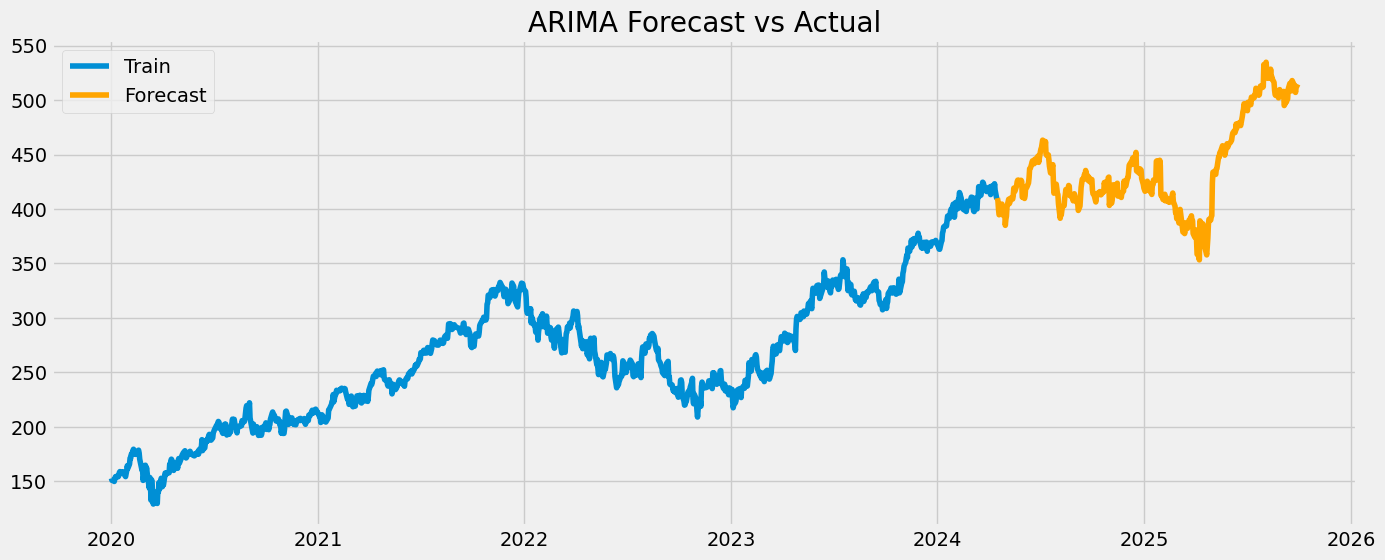

In [28]:
plt.figure(figsize=(15,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Forecast', color='orange')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()


In [29]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assume df['Close'] is your MSFT close price series
data = df['Close'].values.reshape(-1,1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

train_size = len(df) - 365  # Use last 365 days for test
train_scaled = scaled_data[:train_size]
test_scaled = scaled_data[train_size:]

# Function to create time series sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(seq_length, len(data)):
        xs.append(data[i-seq_length:i, 0])
        ys.append(data[i, 0])
    return np.array(xs), np.array(ys)

seq_length = 30  # Use 30 days to predict next day
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)


In [30]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(seq_length,1)),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=2)


Epoch 1/30
30/30 - 6s - 195ms/step - loss: 0.0163 - val_loss: 0.0021
Epoch 2/30
30/30 - 1s - 30ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 3/30
30/30 - 1s - 30ms/step - loss: 0.0017 - val_loss: 5.6317e-04
Epoch 4/30
30/30 - 1s - 31ms/step - loss: 0.0016 - val_loss: 5.7059e-04
Epoch 5/30
30/30 - 1s - 42ms/step - loss: 0.0014 - val_loss: 4.1115e-04
Epoch 6/30
30/30 - 1s - 30ms/step - loss: 0.0014 - val_loss: 7.2090e-04
Epoch 7/30
30/30 - 1s - 30ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/30
30/30 - 1s - 30ms/step - loss: 0.0014 - val_loss: 7.7252e-04
Epoch 9/30
30/30 - 1s - 29ms/step - loss: 0.0012 - val_loss: 8.0478e-04
Epoch 10/30
30/30 - 1s - 31ms/step - loss: 0.0013 - val_loss: 3.2783e-04
Epoch 11/30
30/30 - 1s - 30ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 12/30
30/30 - 2s - 62ms/step - loss: 0.0013 - val_loss: 3.0040e-04
Epoch 13/30
30/30 - 1s - 50ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 14/30
30/30 - 1s - 36ms/step - loss: 0.0012 - val_loss: 2.9154e-04
Epoch 

In [32]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1,1))
y_true = scaler.inverse_transform(y_test.reshape(-1,1))


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse_lstm = np.sqrt(mean_squared_error(y_true, y_pred))
mae_lstm = mean_absolute_error(y_true, y_pred)

print("LSTM RMSE:", rmse_lstm)
print("LSTM MAE:", mae_lstm)


LSTM RMSE: 17.015812113840077
LSTM MAE: 14.45068259168027


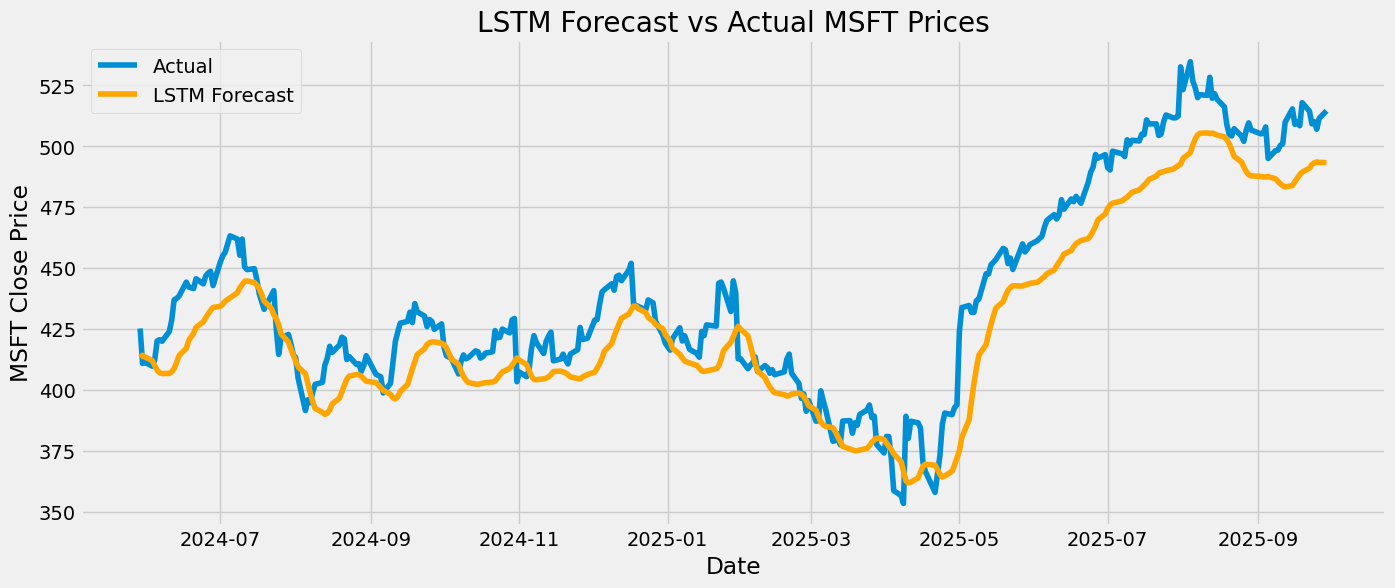

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(df.index[-len(y_pred):], y_true, label="Actual")
plt.plot(df.index[-len(y_pred):], y_pred, label="LSTM Forecast", color="orange")
plt.title("LSTM Forecast vs Actual MSFT Prices")
plt.xlabel("Date")
plt.ylabel("MSFT Close Price")
plt.legend()
plt.show()


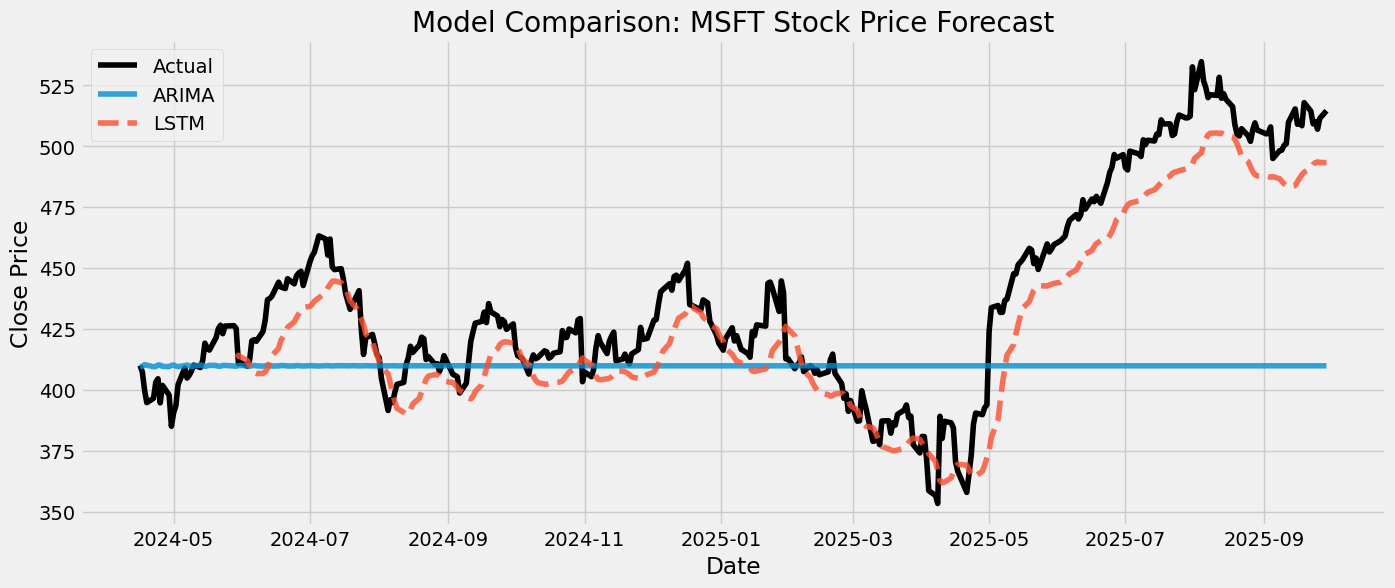

In [35]:
import matplotlib.pyplot as plt

# Suppose you have:
# test:           The actual MSFT closing prices (as a Pandas Series)
# forecast_arima: ARIMA model forecasts (numpy array or Pandas Series)
# forecast_lstm:  LSTM forecasts (numpy array, may be shorter by seq_length)

# Align LSTM forecast and ground truth if needed:
# If LSTM sequences mean your forecast is shorter, align the corresponding part of 'test':
lstm_offset = len(test) - len(y_pred)
test_lstm = test.iloc[lstm_offset:]

plt.figure(figsize=(15, 6))
plt.plot(test.index, test.values, label='Actual', color='black')
plt.plot(test.index, forecast, label='ARIMA', alpha=0.8)
plt.plot(test_lstm.index, y_pred, label='LSTM', alpha=0.8, linestyle='--')

plt.title('Model Comparison: MSFT Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [36]:
pct_diff_arima_lstm = ((rmse_lstm - rmse) / rmse) * 100
print("LSTM RMSE is", round(pct_diff_arima_lstm,2), "% higher/lower than ARIMA.")

LSTM RMSE is -65.28 % higher/lower than ARIMA.
